In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bank1.csv')

In [5]:
y = df['subscribed']

In [6]:
df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [7]:
x =df[['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing-loan', 'personal-loan', 'current-campaign',
       'previous-campaign']]

In [8]:
df['age'] = pd.cut(df.age,bins=[18,28,39,50,60,100],labels=['Teen','Young','Adult','Seniors','Elderly'])

In [9]:
encoded_data = pd.get_dummies(x,drop_first=True)

In [10]:
encoded_data

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4517,57,-3313,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,1
4518,57,295,11,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4519,28,1137,4,3,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [20]:
df['subscribed'] = df['subscribed'].map(lambda x:1 if x == 'yes')

In [21]:
y = df['subscribed']

In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: subscribed, Length: 4521, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(encoded_data,y,test_size=0.30,random_state = 100)

In [64]:
x_train.shape

(3164, 26)

In [65]:
y_train.shape

(3164,)

In [66]:
x_test.shape

(1357, 26)

In [67]:
y_test.shape

(1357,)

In [68]:
df2 = x_train.reset_index()

In [69]:
df3 = y_train.reset_index()

In [70]:
df4 = df3.merge(df2,on = 'index')

In [71]:
df4.head()

,index,subscribed,balance,current-campaign,previous-campaign,age_Young,age_Adult,age_Seniors,age_Elderly,job_blue-collar,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,2085,0,-77,3,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,1239,0,4229,2,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,1
2,130,0,168,3,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,2345,0,512,5,3,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
4,1296,0,2,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [72]:
df4.drop('index',axis = 1,inplace= True)

In [73]:
bank_subscribed_no = df4[df4['subscribed'] == 0]
bank_subscribed_yes = df4[df4['subscribed'] == 1]

In [74]:
from sklearn.utils import resample

In [75]:
df_minority_upsampled  = resample(bank_subscribed_yes,replace =True,n_samples = 2500)

In [76]:
df_minority_upsampled.shape

(2500, 27)

In [77]:
df2 = pd.concat([bank_subscribed_no,df_minority_upsampled])

In [78]:
df2['subscribed'].value_counts()

0    2785
1    2500
Name: subscribed, dtype: int64

In [79]:
y_train = df2['subscribed']

In [80]:
y_train.shape

(5285,)

In [81]:
x_train.shape

(3164, 26)

In [82]:
df2.drop('subscribed',inplace=True,axis=1)

In [83]:
x_train = df2

In [84]:
x_train.isnull().sum()

balance                0
current-campaign       0
previous-campaign      0
age_Young              0
age_Adult              0
age_Seniors            0
age_Elderly            0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing-loan_yes       0
personal-loan_yes      0
dtype: int64

In [85]:
import statsmodels.api as sm

In [86]:
model_1 = sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.627326
         Iterations 6


In [87]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             subscribed   No. Observations:                 5285
Model:                          Logit   Df Residuals:                     5259
Method:                           MLE   Df Model:                           25
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.09306
Time:                        09:46:00   Log-Likelihood:                -3315.4
converged:                       True   LL-Null:                       -3655.6
Covariance Type:            nonrobust   LLR p-value:                1.807e-127
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
balance             -1.166e-05   1.08e-05     -1.077      0.281   -3.29e-05    9.55e-06
current-campaign       -0.0699      0.012     -5.605      0.000      -0.094      -0.045
previous-campaign       0.2338      0.020     11.770      0.000       0.195       0.273
age_Young               0.0164      0.101      0.162      0.871      -0.181       0.214
age_Adult               0.0749      0.104      0.723      0.470      -0.128       0.278
age_Seniors            -0.1198      0.120     -0.999      0.318      -0.355       0.115
age_Elderly             1.3566      0.211      6.428      0.000       0.943       1.770
job_blue-collar        -0.2848      0.106     -2.698      0.007      -0.492      -0.078
job_entrepreneur       -0.1106      0.189     -0.584      0.559      -0.481       0.260
job_housemaid          -0.1956      0.210     -0.932      0.351      -0.607       0.216
job_management          0.1403      0.116      1.205      0.228      -0.088       0.368
job_retired             0.3392      0.168      2.023      0.043       0.011       0.668
job_self-employed      -0.3852      0.178     -2.169      0.030      -0.733      -0.037
job_services           -0.1846      0.122     -1.510      0.131      -0.424       0.055
job_student             0.1368      0.225      0.607      0.544      -0.305       0.579
job_technician         -0.3548      0.106     -3.333      0.001      -0.563      -0.146
job_unemployed         -0.4360      0.195     -2.240      0.025      -0.817      -0.055
job_unknown             0.2322      0.326      0.712      0.477      -0.407       0.872
marital_married        -0.3922      0.084     -4.662      0.000      -0.557      -0.227
marital_single         -0.0188      0.093     -0.201      0.841      -0.202       0.164
education_secondary     0.5162      0.090      5.740      0.000       0.340       0.692
education_tertiary      0.6086      0.113      5.374      0.000       0.387       0.831
education_unknown      -0.0291      0.177     -0.165      0.869      -0.376       0.318
default_yes             0.3157      0.212      1.492      0.136      -0.099       0.730
housing-loan_yes       -0.4613      0.062     -7.431      0.000      -0.583      -0.340
personal-loan_yes      -0.5610      0.090     -6.200      0.000      -0.738      -0.384
=======================================================================================
"""

In [88]:
def get_significant_vars(lm):
    var_p_vals = pd.DataFrame(lm.pvalues)
    var_p_vals['vars'] = var_p_vals.index
    var_p_vals.columns = ['pvals','vars']
    return list(var_p_vals[var_p_vals.pvals <=0.05]['vars'])

In [89]:
get_significant_vars(model_1)

['current-campaign',
 'previous-campaign',
 'age_Elderly',
 'job_blue-collar',
 'job_retired',
 'job_self-employed',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'education_secondary',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [90]:
significant_vars = get_significant_vars(model_1)

In [91]:
final_model = sm.Logit(y_train,sm.add_constant(x_train[significant_vars])).fit()

Optimization terminated successfully.
         Current function value: 0.628913
         Iterations 6


In [93]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             subscribed   No. Observations:                 5285
Model:                          Logit   Df Residuals:                     5271
Method:                           MLE   Df Model:                           13
Date:                Tue, 16 Mar 2021   Pseudo R-squ.:                 0.09076
Time:                        09:47:33   Log-Likelihood:                -3323.8
converged:                       True   LL-Null:                       -3655.6
Covariance Type:            nonrobust   LLR p-value:                2.078e-133
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0820      0.104      0.788      0.431      -0.122       0.286
current-campaign       -0.0749      0.013     -5.953      0.000      -0.100      -0.050
previous-campaign       0.2300      0.020     11.660      0.000       0.191       0.269
age_Elderly             1.3886      0.187      7.438      0.000       1.023       1.755
job_blue-collar        -0.2827      0.090     -3.143      0.002      -0.459      -0.106
job_retired             0.2002      0.146      1.371      0.170      -0.086       0.486
job_self-employed      -0.4385      0.161     -2.723      0.006      -0.754      -0.123
job_technician         -0.3748      0.084     -4.472      0.000      -0.539      -0.211
job_unemployed         -0.4672      0.185     -2.524      0.012      -0.830      -0.104
marital_married        -0.4108      0.060     -6.867      0.000      -0.528      -0.294
education_secondary     0.4550      0.090      5.061      0.000       0.279       0.631
education_tertiary      0.6355      0.099      6.426      0.000       0.442       0.829
housing-loan_yes       -0.4717      0.061     -7.711      0.000      -0.592      -0.352
personal-loan_yes      -0.5529      0.090     -6.159      0.000      -0.729      -0.377
=======================================================================================
"""

In [94]:
pred_y = pd.DataFrame({'Actual':y_test,'Predicted Probablities':final_model.predict(sm.add_constant(x_test[significant_vars]))})

In [96]:
pred_y

,Actual,Predicted Probablities
3731,0,0.719394
2367,0,0.351059
1166,1,0.621938
2973,1,0.245437
2139,0,0.557697
...,...,...
316,0,0.442405
3849,0,0.314756
66,0,0.396419
1741,0,0.427402


In [120]:
pred_y1 = final_model.predict(x_test)

In [121]:
pred_y1

3731    0.719394
2367    0.351059
1166    0.621938
2973    0.245437
2139    0.557697
          ...   
316     0.442405
3849    0.314756
66      0.396419
1741    0.427402
1928    0.667536
Length: 1357, dtype: float64

In [119]:
x_test = sm.add_constant(x_test[['current-campaign',
 'previous-campaign',
 'age_Elderly',
 'job_blue-collar',
 'job_retired',
 'job_self-employed',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'education_secondary',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']])

In [213]:
pred_y['Predicted Class'] =  pred_y['Predicted Probablities'].map(lambda x:1 if x >= 0.635 else 0)

In [214]:
pred_y

,Actual,Predicted Probablities,Predicted Class
3731,0,0.719394,1
2367,0,0.351059,0
1166,1,0.621938,0
2973,1,0.245437,0
2139,0,0.557697,0
...,...,...,...
316,0,0.442405,0
3849,0,0.314756,0
66,0,0.396419,0
1741,0,0.427402,0


In [215]:
pred_y.sample(10)

,Actual,Predicted Probablities,Predicted Class
2896,0,0.752166,1
3047,0,0.497593,0
3352,0,0.334204,0
3054,0,0.595595,0
2339,0,0.283377,0
2739,0,0.401685,0
3581,0,0.336631,0
3901,0,0.361190,0
970,1,0.252774,0
333,1,0.222725,0


In [216]:
from sklearn import metrics

In [217]:
def draw_cm(actual,predicted):
    cm = metrics.confusion_matrix(actual,predicted,[1,0])
    sns.heatmap(cm,annot = True,fmt = '.2f',xticklabels=['Bad Credit','Good Credit'],yticklabels=['Bad Credit','Good Credit'])
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


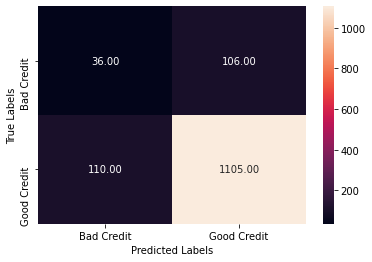

In [218]:
draw_cm(pred_y['Actual'],pred_y['Predicted Class'])

In [106]:
from sklearn.metrics import confusion_matrix,classification_reportaccuracy_score

In [162]:
confusion_matrix(pred_y['Actual'],pred_y['Predicted Class'])

array([[884, 331],
       [ 72,  70]], dtype=int64)

In [219]:
print(classification_report(pred_y['Actual'],pred_y['Predicted Class']))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1215
           1       0.25      0.25      0.25       142

    accuracy                           0.84      1357
   macro avg       0.58      0.58      0.58      1357
weighted avg       0.84      0.84      0.84      1357



# Inference:  From the analysis I can say that the False positives are 110 and False Negatives are 106